In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [2]:
data = pd.read_excel('walmart Retail Data.xlsx')
print(data.head())


         City  Customer Age      Customer Name Customer Segment  Discount  \
0  McKeesport           NaN     Jessica Myrick   Small Business      0.10   
1       Bowie           NaN     Matt Collister      Home Office      0.08   
2        Napa           NaN  Alan Schoenberger        Corporate      0.00   
3  Montebello           NaN  Elizabeth Moffitt         Consumer      0.08   
4        Napa           NaN  Alan Schoenberger        Corporate      0.07   

   Number of Records Order Date  Order ID Order Priority  Order Quantity  ...  \
0                  1 2012-01-01     28774           High              32  ...   
1                  1 2012-01-01     13729  Not Specified               9  ...   
2                  1 2012-01-02     37537            Low               4  ...   
3                  1 2012-01-02     44069       Critical              43  ...   
4                  1 2012-01-02     37537            Low              43  ...   

    Profit Region Row ID    Sales  Ship Date      

In [3]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [5]:
monthly_sales_data = data.resample('ME', on='Order Date')['Sales'].sum()

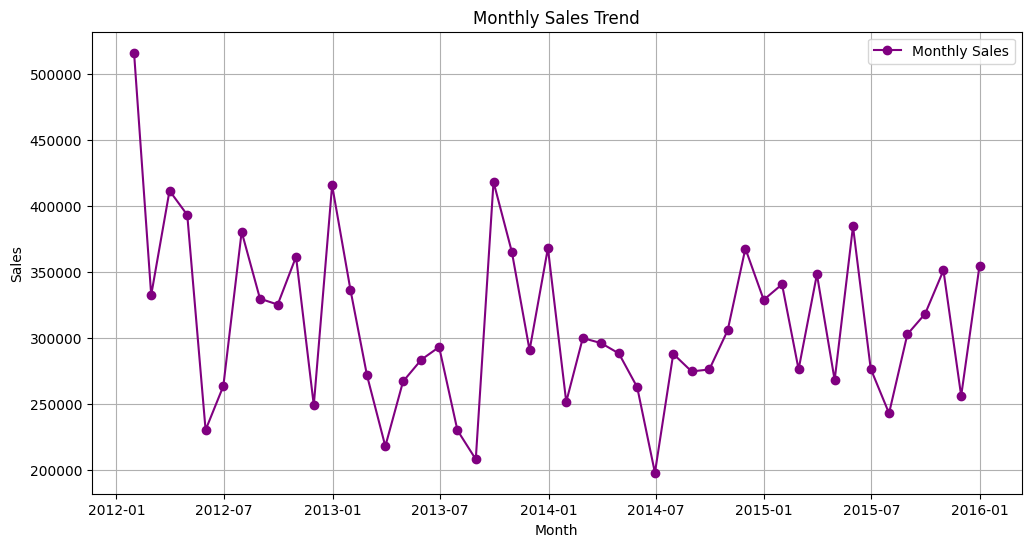

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_data, marker='o', label='Monthly Sales',color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [7]:
adf_results = adfuller(monthly_sales_data.dropna())
print(f"ADF Statistic: {adf_results[0]}")
print(f"P-value: {adf_results[1]}")
print(f"Critical Values: {adf_results[4]}")

ADF Statistic: -7.051210351232603
P-value: 5.520440777337416e-10
Critical Values: {'1%': np.float64(-3.5778480370438146), '5%': np.float64(-2.925338105429433), '10%': np.float64(-2.6007735310095064)}


In [8]:
train_data, test_data = monthly_sales_data[:-12], monthly_sales_data[-12:]


In [9]:
sarima_model = SARIMAX(monthly_sales_data, 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 1, 12))
sarima_fitted = sarima_model.fit()

C:\Users\22501\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\22501\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [10]:
forecast = sarima_fitted.get_forecast(steps=12)
forecast_index = pd.date_range(monthly_sales_data.index[-1], periods=12, freq='M')
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

C:\Users\22501\AppData\Local\Temp\ipykernel_34792\4076658186.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(monthly_sales_data.index[-1], periods=12, freq='M')


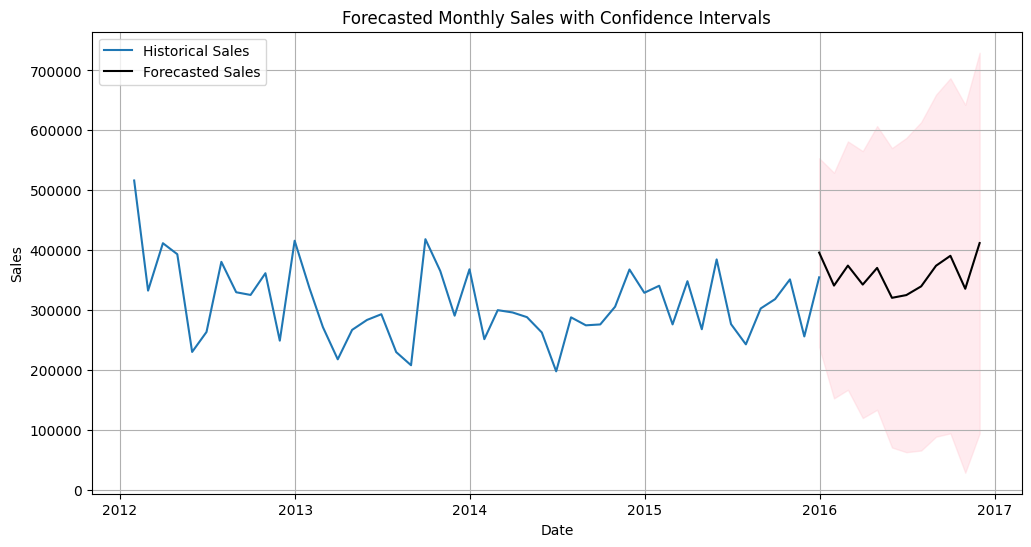

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_data, label='Historical Sales')
plt.plot(forecast_index, forecast_mean, label='Forecasted Sales', color='black')
plt.fill_between(forecast_index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Forecasted Monthly Sales with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [12]:
forecasted_values = sarima_fitted.get_forecast(steps=12).predicted_mean
mae = mean_absolute_error(test_data, forecasted_values)
mse = mean_squared_error(test_data, forecasted_values)
rmse = np.sqrt(mse)

In [13]:
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 52485.328184916
Mean Squared Error (MSE): 3167185864.4572997
Root Mean Squared Error (RMSE): 56277.75639146695
